# importing

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import librosa.display as ld
import librosa, IPython
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow as tf
from keras import layers
from tensorflow.keras import Sequential
import cv2
import os

# **1. Data Exploration**

### **CSV data exploration**

In [3]:
df = pd.read_csv('./Data/features_30_sec.csv')

In [ ]:
df.shape

In [5]:
df.columns.value_counts().sum()

60

In [ ]:
import numpy as np

In [4]:
# see have some null value in our dataset
df[df.isna()].value_counts().sum()

0

In [6]:
df.describe()

length  chroma_stft_mean  chroma_stft_var     rms_mean  \
count    1000.000000       1000.000000      1000.000000  1000.000000   
mean   662030.846000          0.378682         0.086340     0.130930   
std      1784.073992          0.081705         0.007735     0.065683   
min    660000.000000          0.171939         0.044555     0.005276   
25%    661504.000000          0.319562         0.082298     0.086657   
50%    661794.000000          0.383148         0.086615     0.122443   
75%    661794.000000          0.435942         0.091256     0.175682   
max    675808.000000          0.663685         0.108111     0.397973   

           rms_var  spectral_centroid_mean  spectral_centroid_var  \
count  1000.000000             1000.000000           1.000000e+03   
mean      0.003051             2201.780898           4.696916e+05   
std       0.003634              715.960600           4.008995e+05   
min       0.000004              570.040355           7.911251e+03   
25%       0.000942             1627.697311           1.843505e+05   
50%       0.001816             2209.263090           3.384862e+05   
75%       0.003577             2691.294667           6.121479e+05   
max       0.027679             4435.243901           3.036843e+06   

       spectral_bandwidth_mean  spectral_bandwidth_var  rolloff_mean  ...  \
count              1000.000000             1000.000000   1000.000000  ...   
mean               2242.541070           137079.155165   4571.549304  ...   
std                 526.316473            96455.666326   1574.791602  ...   
min                 898.066208            10787.185064    749.140636  ...   
25%                1907.240605            67376.554428   3380.069642  ...   
50%                2221.392843           111977.548036   4658.524473  ...   
75%                2578.469836           182371.576801   5533.810460  ...   
max                3509.646417           694784.811549   8677.672688  ...   

       mfcc16_mean   mfcc16_var  mfcc17_mean   mfcc17_var  mfcc18_mean  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      1.148144    60.730958    -3.966028    62.633624     0.507696   
std       4.578948    33.781951     4.549697    33.479172     3.869105   
min     -15.693844     9.169314   -17.234728    13.931521   -11.963694   
25%      -1.863280    40.376442    -7.207225    40.830875    -2.007015   
50%       1.212809    52.325077    -4.065605    54.717674     0.669643   
75%       4.359662    71.691755    -0.838737    75.040838     3.119212   
max      13.457150   392.932373    11.482946   406.058868    15.388390   

        mfcc18_var  mfcc19_mean   mfcc19_var  mfcc20_mean   mfcc20_var  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean     63.712586    -2.328761    66.231930    -1.095348    70.126096  
std      34.401977     3.755957    37.174631     3.837007    45.228512  
min      15.420555   -18.501955    13.487622   -19.929634     7.956583  
25%      41.884240    -4.662925    41.710184    -3.368996    42.372865  
50%      54.804890    -2.393862    57.423059    -1.166289    59.186117  
75%      75.385832     0.150573    78.626444     1.312615    85.375374  
max     332.905426    14.694924   393.161987    15.369627   506.065155  

[8 rows x 58 columns]

mean_cols size: 28


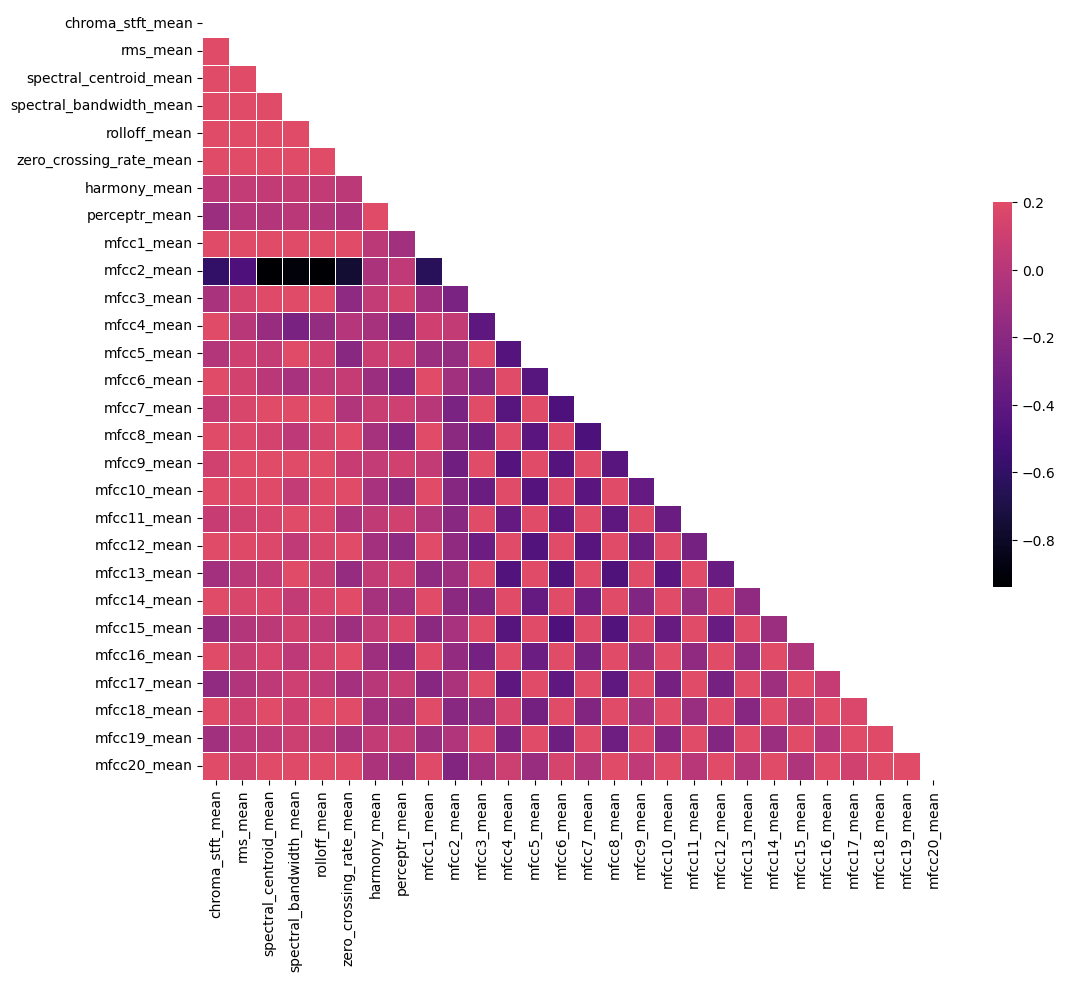

In [7]:
mean_cols = [col for col in df.columns if 'mean' in col]
corr = df[mean_cols].corr()

mask = np.triu(np.ones_like(corr,  dtype = bool))
plt.figure(figsize = (12, 10))
print("mean_cols size:", len(mean_cols))
sns.heatmap(data = corr, mask = mask, vmax =.2, cmap = 'magma', linewidths = .5, center = 0, cbar_kws={"shrink": .5})
plt.show()

In [8]:
X = df.drop(['label'],axis = 1)
X = X.iloc[0:, 2:]
y = df['label']
transformer = preprocessing.MinMaxScaler()
x_trans = transformer.fit_transform(X)
X = pd.DataFrame(x_trans, columns = X.columns)

In [9]:
X.head()

chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0          0.362279         0.695468  0.318188  0.101983   
1          0.343622         0.793392  0.230894  0.085580   
2          0.389832         0.640692  0.433652  0.099064   
3          0.473508         0.777954  0.345856  0.229160   
4          0.277759         0.681062  0.219641  0.083075   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                0.314117               0.040233                 0.422879   
1                0.248405               0.121475                 0.436889   
2                0.254261               0.049046                 0.325334   
3                0.129376               0.058253                 0.267404   
4                0.327270               0.110761                 0.325514   

   spectral_bandwidth_var  rolloff_mean  rolloff_var  ...  mfcc16_mean  \
0                0.109789      0.385532     0.102567  ...     0.564186   
1                0.296867      0.353329     0.342717  ...     0.570198   
2                0.095712      0.289224     0.088981  ...     0.622467   
3                0.227566      0.181068     0.171001  ...     0.565151   
4                0.113536      0.357017     0.180228  ...     0.383289   

   mfcc16_var  mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0    0.112704     0.541287    0.057615     0.422444    0.082450     0.487950   
1    0.120353     0.574685    0.118286     0.448184    0.102997     0.548800   
2    0.081898     0.331003    0.085962     0.370988    0.116420     0.453724   
3    0.091876     0.484549    0.092509     0.460684    0.068975     0.538690   
4    0.200462     0.410225    0.156424     0.403875    0.120300     0.424652   

   mfcc19_var  mfcc20_mean  mfcc20_var  
0    0.109503     0.599189    0.078255  
1    0.099081     0.579640    0.075947  
2    0.087317     0.501381    0.045405  
3    0.062612     0.468060    0.048168  
4    0.130173     0.233047    0.094836  

[5 rows x 57 columns]

In [10]:
# reduce the dimasion of our dataset to 2 for scatter plot using Principal Component Analysis
PCA_model = PCA(n_components=2)
df_min = PCA_model.fit_transform(X)
df_min = pd.DataFrame(df_min, columns = ['pca_col1', 'pca_col2'])
df_min = pd.concat([df_min, y], axis = 1)

In [11]:
df_min.head()

pca_col1  pca_col2  label
0 -0.394212 -0.116145  blues
1  0.052019 -0.270757  blues
2 -0.479184 -0.224616  blues
3  0.017145 -0.439886  blues
4 -0.160395 -0.508617  blues

<AxesSubplot: xlabel='pca_col1', ylabel='pca_col2'>

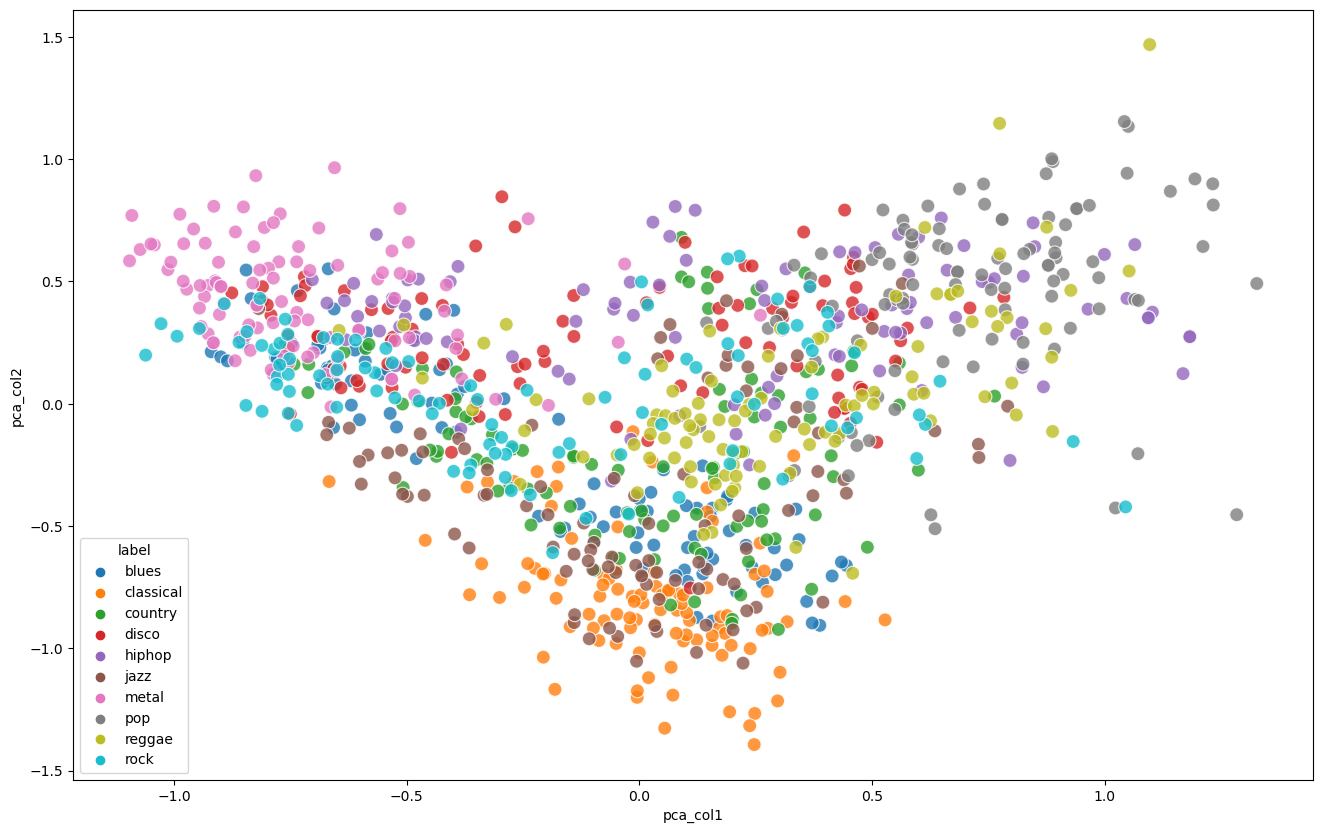

In [12]:
plt.figure(figsize = (16, 10))
sns.scatterplot(x = df_min['pca_col1'], y = df_min['pca_col2'], data = df_min, hue = 'label', s = 100, alpha = 0.8)

### **Audio Exploration**

In [14]:
audio_data, sr = librosa.load("./Data/genres_original/pop/pop.00000.wav")
audio, _ = librosa.effects.trim(audio_data)
print('audio_data size :', audio_data.shape[0])
print('Sample Rate :', sr)
print('audio file len :', audio_data.shape[0]/sr)


audio_data size : 661504
Sample Rate : 22050
audio file len : 30.00018140589569


In [15]:
IPython.display.Audio(audio_data, rate= sr)

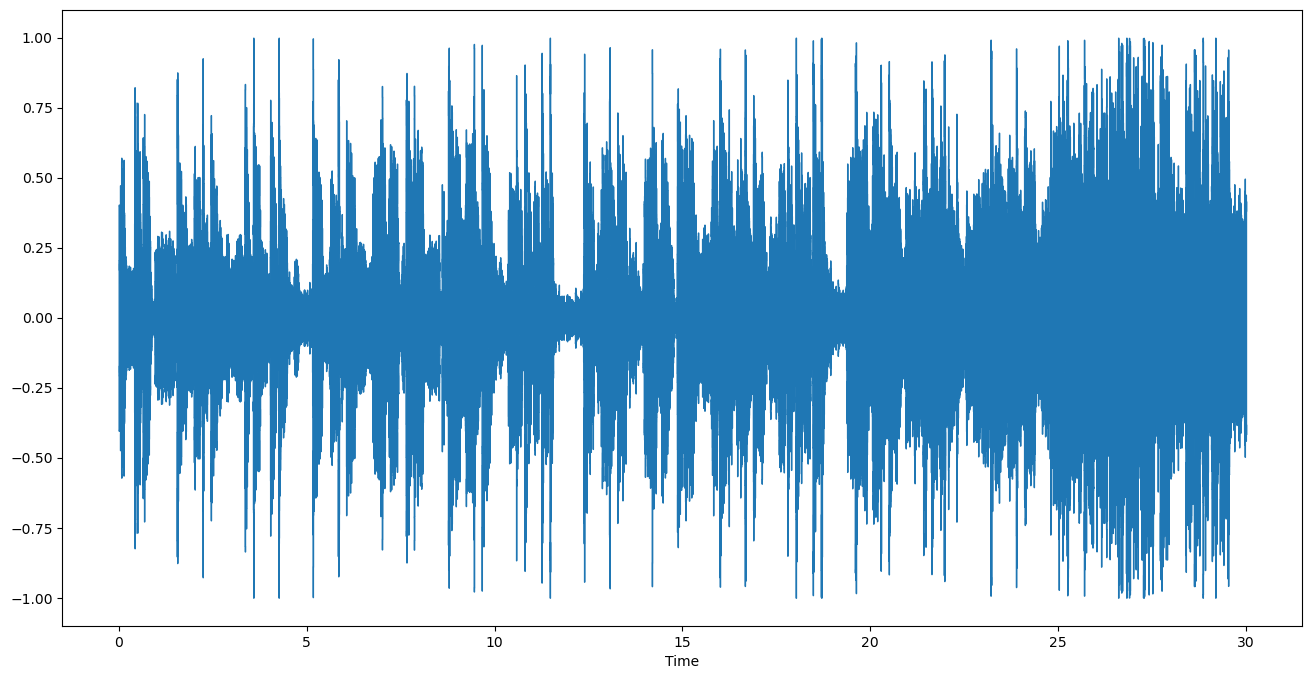

In [16]:
plt.figure(figsize = (16, 8))
librosa.display.waveshow(y = audio, sr = sr)

/var/folders/c2/91ntt7r91zq873dpkq9k1cxh0000gn/T/ipykernel_47621/1729441845.py:1: FutureWarning: Pass n_fft=2048, hop_length=512 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stft= np.abs(librosa.stft(audio, 2048, 512))


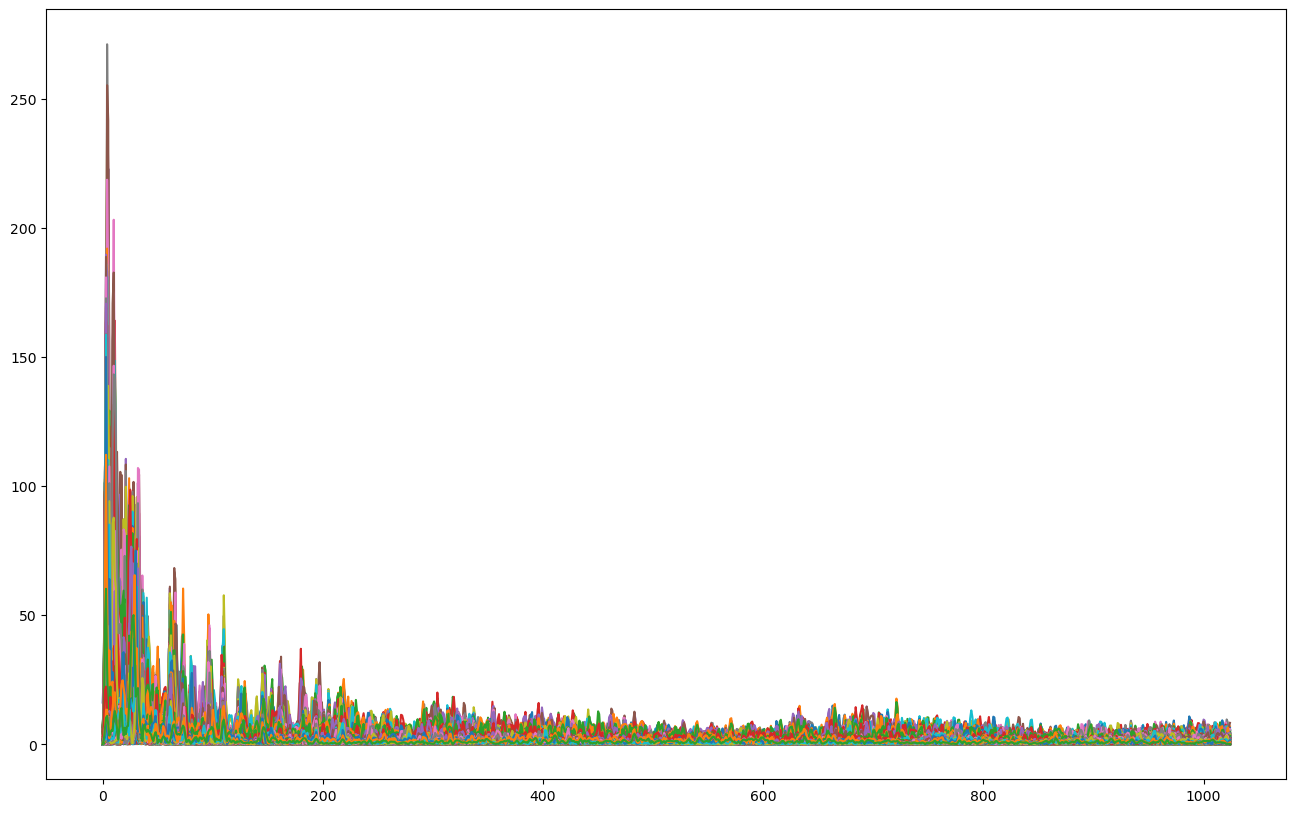

In [17]:
stft= np.abs(librosa.stft(audio, 2048, 512))
plt.figure(figsize = (16, 10))
plt.plot(stft);
plt.show()

/var/folders/c2/91ntt7r91zq873dpkq9k1cxh0000gn/T/ipykernel_47621/35445197.py:1: FutureWarning: Pass ref=<function amax at 0x7f9be4627130> as keyword args. From version 0.10 passing these as positional arguments will result in an error
  x_db = librosa.amplitude_to_db(stft, np.max)


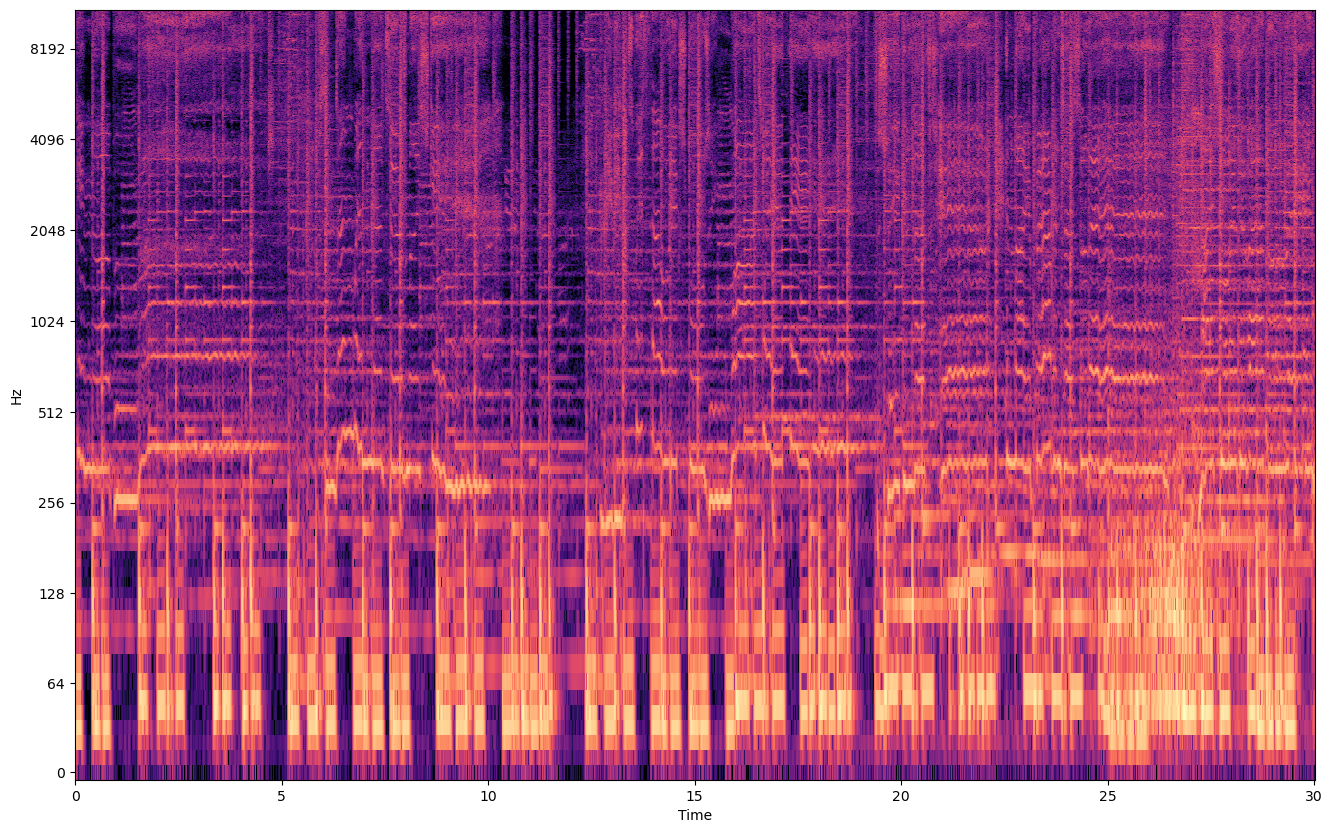

In [18]:
x_db = librosa.amplitude_to_db(stft, np.max)
plt.figure(figsize = (16, 10))
librosa.display.specshow(x_db, sr = sr, x_axis ='time', y_axis = 'log' )
plt.show()

# **2. Modeling**

### **Machine learning models**

In [2]:
#load 3 sec dataset for modeling
df = pd.read_csv('./Data/features_3_sec.csv')

#### Data preprocssing

In [3]:
# Encode label (y) with LabelEncoder and scalle data feature using MinMaxScaler
df['label'] = preprocessing.LabelEncoder().fit_transform(df['label'])
X = df.drop(['label', 'length', 'filename'], axis = 1)
scaller = preprocessing.MinMaxScaler()
X = pd.DataFrame(scaller.fit_transform(X), columns = X.columns)
y = df['label']

In [21]:
X.head()

chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0          0.355399         0.716757  0.293133  0.107955   
1          0.367322         0.670347  0.253040  0.044447   
2          0.373159         0.728067  0.296753  0.141663   
3          0.399349         0.677066  0.298024  0.075042   
4          0.355668         0.689113  0.322308  0.052149   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                0.262173               0.034784                 0.459205   
1                0.270969               0.018716                 0.470831   
2                0.265293               0.023073                 0.494051   
3                0.238427               0.023187                 0.455246   
4                0.233460               0.016451                 0.451651   

   spectral_bandwidth_var  rolloff_mean  rolloff_var  ...  mfcc16_mean  \
0                0.094130      0.346153     0.083164  ...     0.363613   
1                0.052261      0.363722     0.051694  ...     0.468596   
2                0.059922      0.378215     0.060820  ...     0.479681   
3                0.066234      0.329587     0.070906  ...     0.386258   
4                0.047830      0.318453     0.046916  ...     0.438567   

   mfcc16_var  mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0    0.056198     0.397172    0.066062     0.371828    0.055344     0.380831   
1    0.092912     0.351681    0.074001     0.362068    0.076365     0.418452   
2    0.096704     0.420979    0.050639     0.400536    0.067509     0.433742   
3    0.067995     0.387474    0.050617     0.380430    0.050030     0.405824   
4    0.042500     0.460314    0.083860     0.388590    0.076524     0.409019   

   mfcc19_var  mfcc20_mean  mfcc20_var  
0    0.026797     0.506746    0.047781  
1    0.082414     0.593029    0.065548  
2    0.043841     0.546264    0.036062  
3    0.041898     0.562204    0.034873  
4    0.020763     0.517913    0.031713  

[5 rows x 57 columns]

In [22]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [4]:
# split data in train en test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# model fit function
def fit_model(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"train_accuracy and val_accuracy for {model.__str__()} \n")
    print(model.score(x_train, y_train))
    print(accuracy_score(y_test, y_pred))
    print("-------------------------------- ","\n")

In [6]:
# list of estimators
models = [KNeighborsClassifier(n_neighbors=5),
          LogisticRegression(max_iter=1000),
          DecisionTreeClassifier()]

In [7]:
# fit all model in our list estimators
for model in models:
    fit_model(model)

train_accuracy and val_accuracy for KNeighborsClassifier() 

0.9443193193193193
0.9019019019019019
--------------------------------  

train_accuracy and val_accuracy for LogisticRegression(max_iter=1000) 

0.7013263263263263
0.6946946946946947
--------------------------------  

train_accuracy and val_accuracy for DecisionTreeClassifier() 

0.998998998998999
0.6751751751751752
--------------------------------  



{'metric': 'manhattan', 'n_neighbors': 3}
accuracy 0.913162247055223
val_accuracy 0.9279279279279279
confusion matrix


<AxesSubplot: >

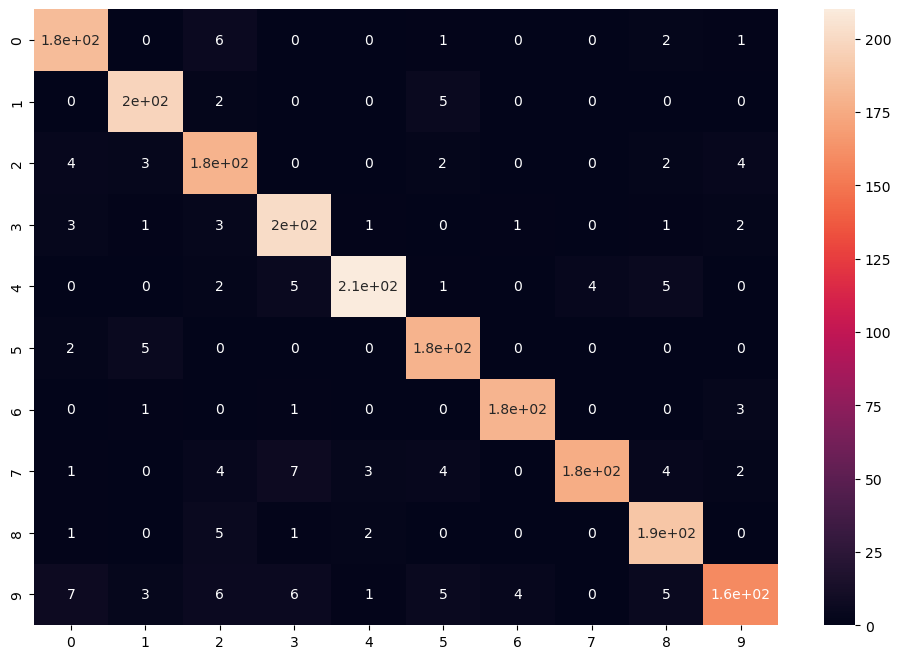

In [29]:
# GriSeachCV for knn model
knn_grid_params = {'n_neighbors': np.arange(3, 50, 2),
                'metric':['euclidean', 'manhattan']}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=knn_grid_params)
knn_grid.fit(x_train, y_train)
best_knn_model = knn_grid.best_estimator_
print(knn_grid.best_params_)
print("accuracy", knn_grid.best_score_)
print("val_accuracy", accuracy_score(y_test, best_knn_model.predict(x_test)))
# plot confusion matrix
conf_matrix = confusion_matrix(y_test, best_knn_model.predict(x_test))
plt.figure(figsize = (12,8))
print("confusion matrix")
sns.heatmap(conf_matrix, annot=True)

### **Deep learning Model**
Now we will use tensorflow framework with keras to build our deep learning models

In [8]:
# building keras model
model = Sequential()
model.add(layers.Flatten(input_shape = (57,)))
model.add(layers.Dense(256, activation ='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128, activation ='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(64, activation ='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation ='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 57)                0         
                                                                 
 dense (Dense)               (None, 256)               14848     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

2022-11-23 01:42:23.084912: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# compile model, we use sparse_categorical_crossentropy as loss beacause we have categorical label (y)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=  'adam', metrics=['accuracy'])

In [10]:
# save trainnig history
history = model.fit(x = x_train, y = y_train, validation_data=(x_test, y_test), epochs=400)

Epoch 1/400
250/250 [==============================] - 1s 2ms/step - loss: 1.8310 - accuracy: 0.3211 - val_loss: 1.3650 - val_accuracy: 0.5025
Epoch 2/400
250/250 [==============================] - 0s 1ms/step - loss: 1.4107 - accuracy: 0.4831 - val_loss: 1.2034 - val_accuracy: 0.5651
Epoch 3/400
250/250 [==============================] - 0s 1ms/step - loss: 1.2679 - accuracy: 0.5389 - val_loss: 1.0691 - val_accuracy: 0.6131
Epoch 4/400
250/250 [==============================] - 0s 1ms/step - loss: 1.1704 - accuracy: 0.5796 - val_loss: 0.9989 - val_accuracy: 0.6471
Epoch 5/400
250/250 [==============================] - 0s 1ms/step - loss: 1.1059 - accuracy: 0.6114 - val_loss: 0.9732 - val_accuracy: 0.6552
Epoch 6/400
250/250 [==============================] - 0s 1ms/step - loss: 1.0550 - accuracy: 0.6264 - val_loss: 0.9142 - val_accuracy: 0.6722
Epoch 7/400
250/250 [==============================] - 0s 1ms/step - loss: 1.0152 - accuracy: 0.6368 - val_loss: 0.9491 - val_accuracy: 0.6692

Epoch 58/400
250/250 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.8342 - val_loss: 0.4416 - val_accuracy: 0.8458
Epoch 59/400
250/250 [==============================] - 0s 1ms/step - loss: 0.4704 - accuracy: 0.8378 - val_loss: 0.4759 - val_accuracy: 0.8323
Epoch 60/400
250/250 [==============================] - 0s 1ms/step - loss: 0.4643 - accuracy: 0.8406 - val_loss: 0.4219 - val_accuracy: 0.8539
Epoch 61/400
250/250 [==============================] - 0s 1ms/step - loss: 0.4654 - accuracy: 0.8390 - val_loss: 0.4441 - val_accuracy: 0.8458
Epoch 62/400
250/250 [==============================] - 0s 1ms/step - loss: 0.4383 - accuracy: 0.8473 - val_loss: 0.4493 - val_accuracy: 0.8443
Epoch 63/400
250/250 [==============================] - 0s 1ms/step - loss: 0.4415 - accuracy: 0.8504 - val_loss: 0.4528 - val_accuracy: 0.8448
Epoch 64/400
250/250 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.8415 - val_loss: 0.4439 - val_accuracy:

Epoch 115/400
250/250 [==============================] - 0s 2ms/step - loss: 0.3222 - accuracy: 0.8864 - val_loss: 0.3781 - val_accuracy: 0.8744
Epoch 116/400
250/250 [==============================] - 0s 1ms/step - loss: 0.3267 - accuracy: 0.8853 - val_loss: 0.3825 - val_accuracy: 0.8789
Epoch 117/400
250/250 [==============================] - 0s 1ms/step - loss: 0.3139 - accuracy: 0.8911 - val_loss: 0.3733 - val_accuracy: 0.8869
Epoch 118/400
250/250 [==============================] - 0s 1ms/step - loss: 0.3166 - accuracy: 0.8923 - val_loss: 0.3565 - val_accuracy: 0.8904
Epoch 119/400
250/250 [==============================] - 0s 1ms/step - loss: 0.3174 - accuracy: 0.8880 - val_loss: 0.3710 - val_accuracy: 0.8774
Epoch 120/400
250/250 [==============================] - 0s 1ms/step - loss: 0.3330 - accuracy: 0.8850 - val_loss: 0.3739 - val_accuracy: 0.8814
Epoch 121/400
250/250 [==============================] - 0s 1ms/step - loss: 0.3242 - accuracy: 0.8906 - val_loss: 0.3721 - val_ac

250/250 [==============================] - 0s 1ms/step - loss: 0.2739 - accuracy: 0.9058 - val_loss: 0.3390 - val_accuracy: 0.8899
Epoch 172/400
250/250 [==============================] - 0s 1ms/step - loss: 0.2573 - accuracy: 0.9095 - val_loss: 0.3449 - val_accuracy: 0.8954
Epoch 173/400
250/250 [==============================] - 0s 1ms/step - loss: 0.2789 - accuracy: 0.9008 - val_loss: 0.3565 - val_accuracy: 0.8869
Epoch 174/400
250/250 [==============================] - 0s 1ms/step - loss: 0.2728 - accuracy: 0.9058 - val_loss: 0.3386 - val_accuracy: 0.8924
Epoch 175/400
250/250 [==============================] - 0s 1ms/step - loss: 0.2618 - accuracy: 0.9100 - val_loss: 0.3115 - val_accuracy: 0.9044
Epoch 176/400
250/250 [==============================] - 0s 1ms/step - loss: 0.2468 - accuracy: 0.9143 - val_loss: 0.3475 - val_accuracy: 0.8899
Epoch 177/400
250/250 [==============================] - 0s 1ms/step - loss: 0.2530 - accuracy: 0.9154 - val_loss: 0.3111 - val_accuracy: 0.9029

250/250 [==============================] - 0s 1ms/step - loss: 0.2370 - accuracy: 0.9190 - val_loss: 0.3559 - val_accuracy: 0.8964
Epoch 228/400
250/250 [==============================] - 0s 1ms/step - loss: 0.2268 - accuracy: 0.9223 - val_loss: 0.3634 - val_accuracy: 0.8964
Epoch 229/400
250/250 [==============================] - 0s 1ms/step - loss: 0.2079 - accuracy: 0.9309 - val_loss: 0.3396 - val_accuracy: 0.9029
Epoch 230/400
250/250 [==============================] - 0s 1ms/step - loss: 0.2151 - accuracy: 0.9264 - val_loss: 0.3332 - val_accuracy: 0.9099
Epoch 231/400
250/250 [==============================] - 0s 1ms/step - loss: 0.2213 - accuracy: 0.9233 - val_loss: 0.3874 - val_accuracy: 0.8919
Epoch 232/400
250/250 [==============================] - 0s 1ms/step - loss: 0.2298 - accuracy: 0.9208 - val_loss: 0.3433 - val_accuracy: 0.8979
Epoch 233/400
250/250 [==============================] - 0s 1ms/step - loss: 0.2248 - accuracy: 0.9251 - val_loss: 0.3272 - val_accuracy: 0.9104

250/250 [==============================] - 0s 1ms/step - loss: 0.2022 - accuracy: 0.9308 - val_loss: 0.3208 - val_accuracy: 0.9069
Epoch 284/400
250/250 [==============================] - 0s 1ms/step - loss: 0.2074 - accuracy: 0.9292 - val_loss: 0.3413 - val_accuracy: 0.9079
Epoch 285/400
250/250 [==============================] - 0s 1ms/step - loss: 0.2118 - accuracy: 0.9268 - val_loss: 0.3273 - val_accuracy: 0.9069
Epoch 286/400
250/250 [==============================] - 0s 1ms/step - loss: 0.2013 - accuracy: 0.9296 - val_loss: 0.3138 - val_accuracy: 0.9109
Epoch 287/400
250/250 [==============================] - 0s 1ms/step - loss: 0.1907 - accuracy: 0.9323 - val_loss: 0.3381 - val_accuracy: 0.9034
Epoch 288/400
250/250 [==============================] - 0s 1ms/step - loss: 0.2087 - accuracy: 0.9243 - val_loss: 0.3360 - val_accuracy: 0.9064
Epoch 289/400
250/250 [==============================] - 0s 1ms/step - loss: 0.2055 - accuracy: 0.9257 - val_loss: 0.3451 - val_accuracy: 0.8994

250/250 [==============================] - 0s 1ms/step - loss: 0.1778 - accuracy: 0.9409 - val_loss: 0.3527 - val_accuracy: 0.9004
Epoch 340/400
250/250 [==============================] - 0s 1ms/step - loss: 0.1939 - accuracy: 0.9347 - val_loss: 0.3100 - val_accuracy: 0.9119
Epoch 341/400
250/250 [==============================] - 0s 1ms/step - loss: 0.1847 - accuracy: 0.9386 - val_loss: 0.3264 - val_accuracy: 0.9099
Epoch 342/400
250/250 [==============================] - 0s 1ms/step - loss: 0.1689 - accuracy: 0.9399 - val_loss: 0.3097 - val_accuracy: 0.9119
Epoch 343/400
250/250 [==============================] - 0s 1ms/step - loss: 0.1963 - accuracy: 0.9344 - val_loss: 0.3059 - val_accuracy: 0.9099
Epoch 344/400
250/250 [==============================] - 0s 1ms/step - loss: 0.1871 - accuracy: 0.9374 - val_loss: 0.3498 - val_accuracy: 0.9079
Epoch 345/400
250/250 [==============================] - 0s 1ms/step - loss: 0.1884 - accuracy: 0.9379 - val_loss: 0.3300 - val_accuracy: 0.9044

250/250 [==============================] - 0s 1ms/step - loss: 0.1760 - accuracy: 0.9411 - val_loss: 0.2914 - val_accuracy: 0.9169
Epoch 396/400
250/250 [==============================] - 0s 1ms/step - loss: 0.1740 - accuracy: 0.9403 - val_loss: 0.3197 - val_accuracy: 0.9189
Epoch 397/400
250/250 [==============================] - 0s 1ms/step - loss: 0.1722 - accuracy: 0.9437 - val_loss: 0.3151 - val_accuracy: 0.9124
Epoch 398/400
250/250 [==============================] - 0s 1ms/step - loss: 0.1661 - accuracy: 0.9427 - val_loss: 0.3240 - val_accuracy: 0.9069
Epoch 399/400
250/250 [==============================] - 0s 1ms/step - loss: 0.1892 - accuracy: 0.9353 - val_loss: 0.3232 - val_accuracy: 0.9114
Epoch 400/400
250/250 [==============================] - 0s 1ms/step - loss: 0.1693 - accuracy: 0.9421 - val_loss: 0.2984 - val_accuracy: 0.9154


In [11]:
# save model
model.save('../models/stuffs/model_stuff.h5')

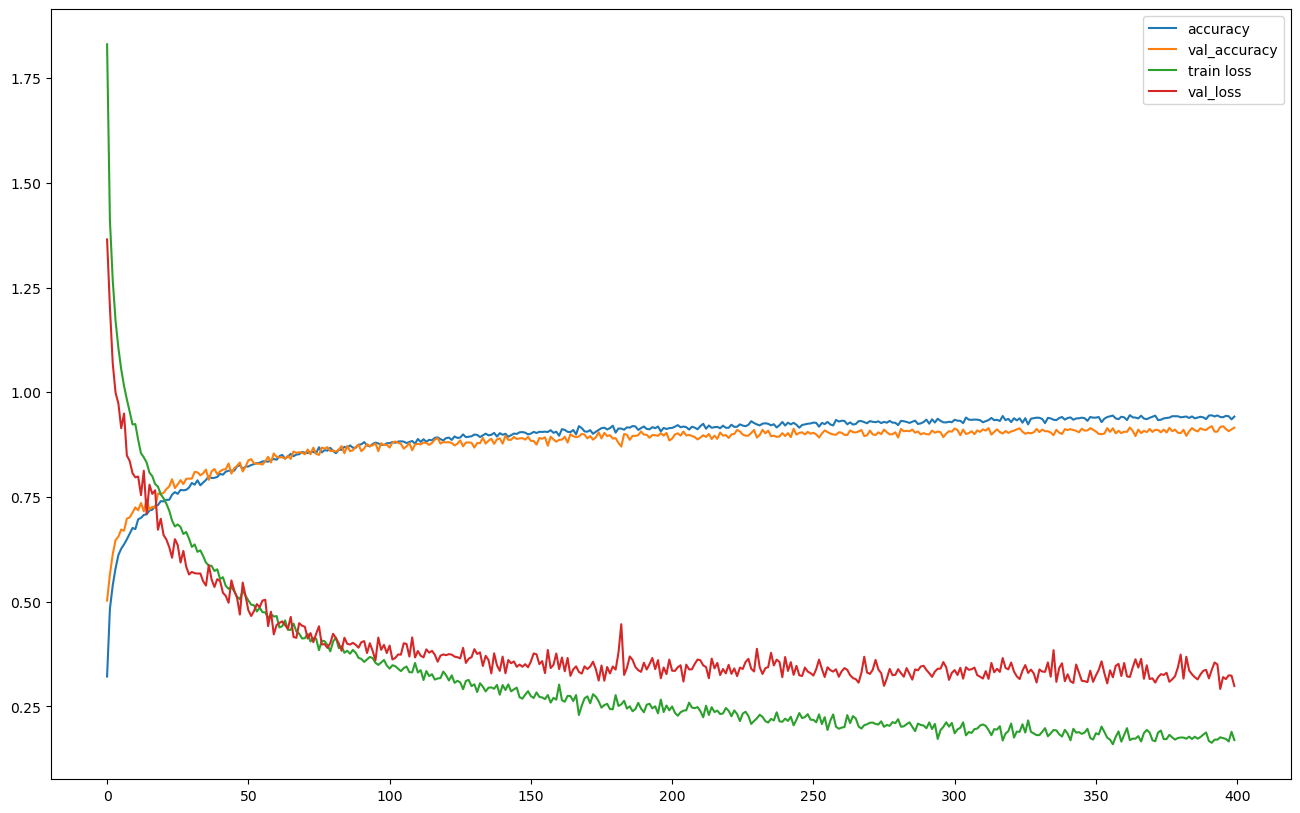

In [12]:
# plot model train en val history
plt.figure(figsize = (16, 10))
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()